In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Introductoin to Neutral Network Classification problems

A classification prob : Binary, Multiclass , multi label classification problems


In [ ]:
##Creating data to view and fit

from sklearn.datasets import make_circles


n_samples = 1000
X,y = make_circles(n_samples,noise =0.03,
                   random_state=42)

In [ ]:
X[:10],y[:10]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
circles= pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


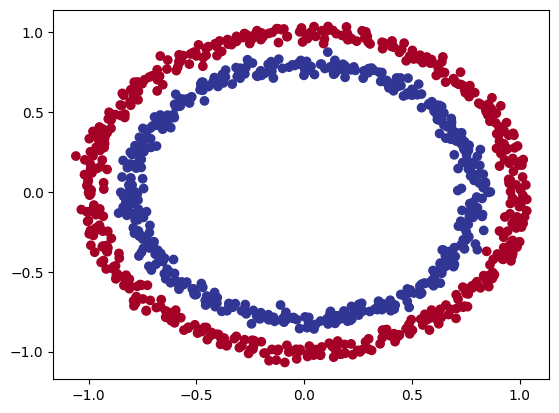

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
X.shape,y.shape,tf.__version__

((1000, 2), (1000,), '2.15.0')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2)

In [ ]:
model1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['accuracy'])


model1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 9ms/step - loss: 5.9702 - accuracy: 0.4830
Epoch 2/5
32/32 [==============================] - 0s 9ms/step - loss: 5.6413 - accuracy: 0.4840
Epoch 3/5
32/32 [==============================] - 0s 11ms/step - loss: 5.2300 - accuracy: 0.4590
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 4.3096 - accuracy: 0.4620
Epoch 5/5
32/32 [==============================] - 0s 9ms/step - loss: 4.1613 - accuracy: 0.4820


In [ ]:
### Try adding another layer to improve accuracy
tf.random.set_seed(42)
model2= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['accuracy'])


model2.fit(X,y,epochs=100,verbose=0)


In [ ]:
model2.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932795643806458, 0.5]

In [ ]:
tf.random.set_seed(42)
model3= tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


history = model3.fit(X,y,epochs=50)


Epoch 1/50
32/32 [==============================] - 2s 10ms/step - loss: 0.6953 - accuracy: 0.4940
Epoch 2/50
32/32 [==============================] - 0s 10ms/step - loss: 0.6902 - accuracy: 0.5360
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 0.6870 - accuracy: 0.5160
Epoch 4/50
32/32 [==============================] - 0s 10ms/step - loss: 0.6829 - accuracy: 0.5050
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6779 - accuracy: 0.5030
Epoch 6/50
32/32 [==============================] - 0s 10ms/step - loss: 0.6703 - accuracy: 0.5070
Epoch 7/50
32/32 [==============================] - 0s 11ms/step - loss: 0.6614 - accuracy: 0.9150
Epoch 8/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6499 - accuracy: 0.6930
Epoch 9/50
32/32 [==============================] - 0s 10ms/step - loss: 0.6354 - accuracy: 0.8200
Epoch 10/50
32/32 [==============================] - 0s 10ms/step - loss: 0.6160 - accuracy: 0.8200
Epoch 11/50


In [ ]:
def plot_decision_boundary(model,X, y):
  """ PLots decision boundary"""
  x_min , x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
  y_min , y_max = X[:,1].min()-0.1 , X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  x_in =np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)
  if(y_pred[0] >1):
    print("Multicalss classification")
    y_pred = np.argmax(y_pred,axis =1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



313/313 [==============================] - 3s 8ms/step
doing binary classification


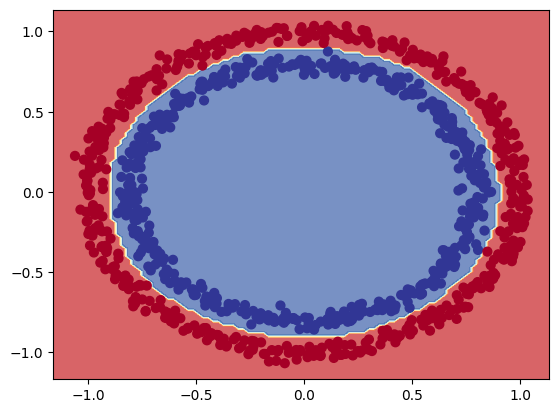

In [ ]:
plot_decision_boundary(model= model3,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression=  tf.range(100,1100,5)

X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
X_reg_train = X_regression[:150]
X_reg_test =X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)
model4= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model4.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])


model4.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train,epochs = 100)


Epoch 1/100
5/5 [==============================] - 3s 7ms/step - loss: 391.3799 - mae: 391.3799
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 273.7940 - mae: 273.7940
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 159.1581 - mae: 159.1581
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 54.1652 - mae: 54.1652
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 77.0637 - mae: 77.0637
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 79.9833 - mae: 79.9833
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 49.5613 - mae: 49.5613
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 52.0536 - mae: 52.0536
Epoch 9/100
5/5 [==============================] - 0s 11ms/step - loss: 47.0337 - mae: 47.0337
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 45.7446 - mae: 45.7446
Epoch 11/100
5/5 [==============================] 

2/2 [==============================] - 0s 7ms/step


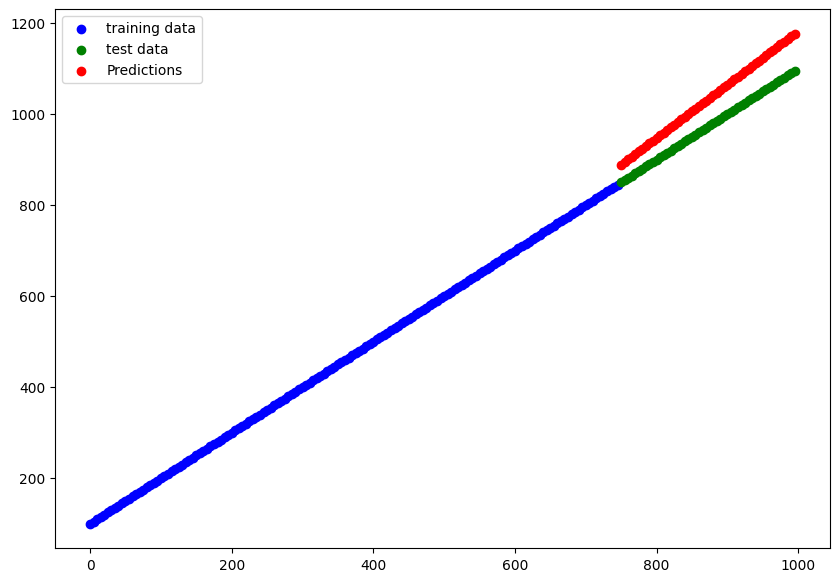

In [ ]:


y_reg_preds = model4.predict(X_reg_test)


plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label="training data")
plt.scatter(X_reg_test,y_reg_test,c='g',label="test data")
plt.scatter(X_reg_test,y_reg_preds,c='r',label="Predictions")
plt.legend()


In [ ]:
len(X)

1000

In [ ]:
len(X_train)

800

In [ ]:
X_train.shape,X_test.shape

((800, 2), (200, 2))

In [ ]:
# create a model to fit on training data andevaluate on test

tf.random.set_seed(42)

model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


model7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])


history = model7.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 10ms/step - loss: 0.6886 - accuracy: 0.5075
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6850 - accuracy: 0.5075
Epoch 3/25
25/25 [==============================] - 0s 9ms/step - loss: 0.6825 - accuracy: 0.5075
Epoch 4/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6797 - accuracy: 0.5075
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.5075
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.5088
Epoch 7/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6672 - accuracy: 0.5075
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6619 - accuracy: 0.5387
Epoch 9/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6562 - accuracy: 0.5075
Epoch 10/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6489 - accuracy: 0.5788
Epoch 11/25
25/25 

In [ ]:
model7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8950


[0.4465509057044983, 0.8949999809265137]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


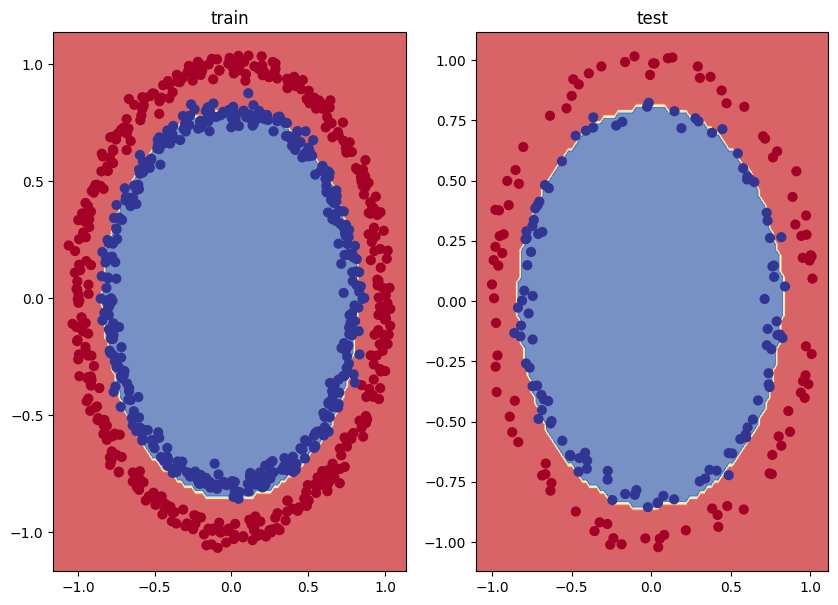

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model7,X_train,y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model7,X_test,y_test)

plt.show()

In [ ]:
###Plot the loss

Text(0.5, 1.0, 'Model 7 loss fucntion')

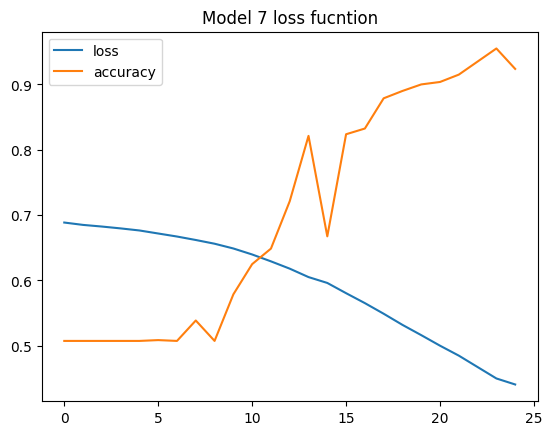

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model 7 loss fucntion")

##Finding the best learning rate

To find the ideal learning rate , lr , we are going to use the following sample_data/
1. learning rate callback
2. Another model
3. Amodified loss curve plot



In [ ]:
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation= "sigmoid")
])

model8.compile(loss="binary_crossentropy",
               optimizer = "Adam",
               metrics=['accuracy'])

#create a leaning rate callback

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 ** (epoch/20))
history8 = model8.fit(X_train,y_train,epochs =100 ,callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7541 - accuracy: 0.4888 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7523 - accuracy: 0.4875 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7504 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7485 - accuracy: 0.4837 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7464 - accuracy: 0.4800 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7441 - accuracy: 0.4812 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7417 - accuracy: 0.4875 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7392 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

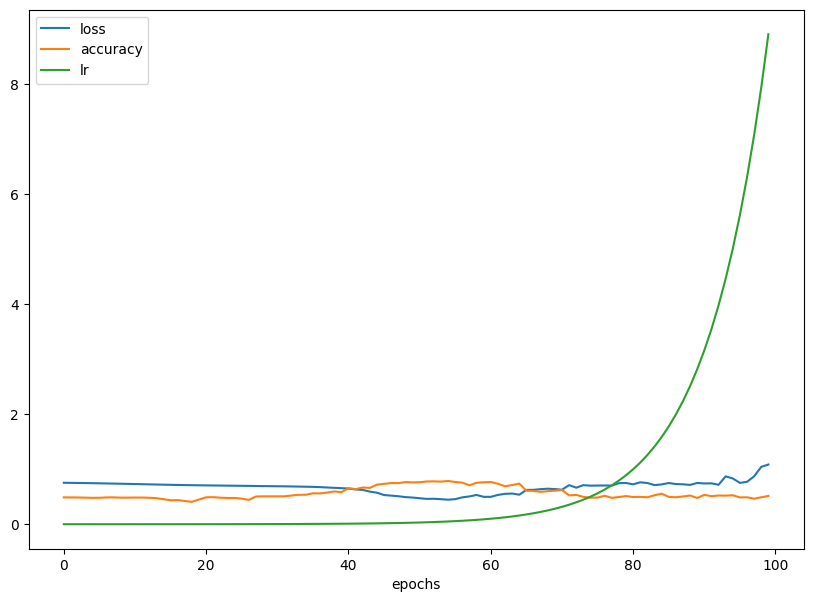

In [ ]:
## Checkout the history


le = pd.DataFrame(history8.history).plot(figsize=(10,7),xlabel="epochs")

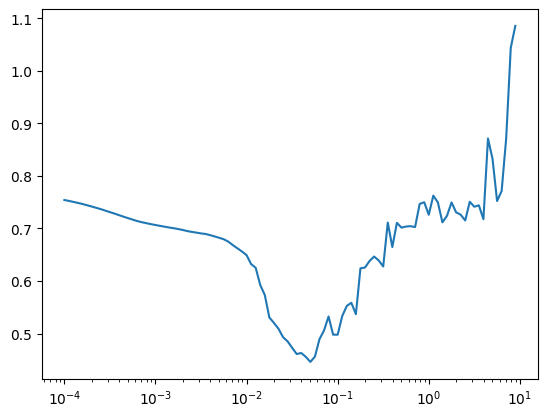

In [ ]:
lrs= 1e-4 * (10** (tf.range(100)/20))
plt.semilogx(lrs,history8.history["loss"])

In [ ]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation= "sigmoid")
])

model9.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.02 ),
               metrics=['accuracy'])

#create a leaning rate callback

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 ** (epoch/20))
history9 = model9.fit(X_train,y_train,epochs =25 ,callbacks=[lr_schedular])

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5163 - lr: 1.1220e-04
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5300 - lr: 1.2589e-04
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5663 - lr: 1.4125e-04
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5800 - lr: 1.5849e-04
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5337 - lr: 1.7783e-04
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5125 - lr: 1.9953e-04
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6897 -

In [ ]:
loss, accuracy = model9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.5950


In [ ]:
from sklearn.metrics import confusion_matrix


ypreds = model7.predict(X_test)

confusion_matrix(y_test,tf.round(ypreds))

7/7 [==============================] - 0s 7ms/step


array([[94,  0],
       [21, 85]])

In [ ]:
import intertools

ModuleNotFoundError: No module named 'intertools'